<a href="https://colab.research.google.com/github/mukhwami/Hello-World/blob/master/g_consumption_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Definition
The problem here is to predict the gas consumption (in millions of gallons) in 48 of the US states based on petrol tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population with the driving license.

## Solution
To solve this regression problem we will use the random forest algorithm via the Scikit-Learn Python library. We will follow the traditional machine learning pipeline to solve this problem. Follow these steps:

In [0]:
#1. Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#2. Importing Dataset

dataset = pd.read_csv("petrol_consumption.csv")

In [0]:
#To get a high-level view of what the dataset looks like

dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


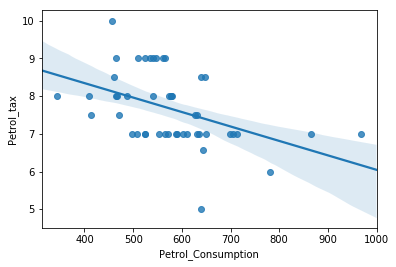

In [0]:
sns.regplot(x='Petrol_Consumption', y='Petrol_tax',data=dataset)

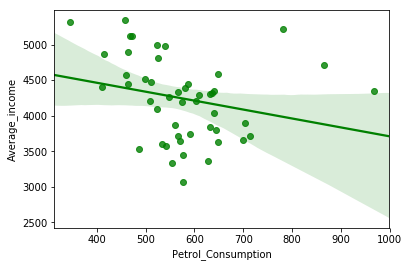

In [0]:
sns.regplot(x='Petrol_Consumption', y='Average_income',data=dataset, color='green')

### 3. Preparing Data For Training

Two tasks will be performed in this section. The first task is to divide data into 'attributes' and 'label' sets. The resultant data is then divided into training and test sets.

In [0]:
#The following script divides data into attributes and labels

x = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [0]:
#divide the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### 4. Feature Scaling

We know our dataset is not yet a scaled value, for instance the Average_Income field has values in the range of thousands while Petrol_tax has values in range of tens. Therefore, it would be beneficial to scale our data.

In [0]:
#we will use Scikit-Learn's StandardScaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 5. Training the Algorithm

Now that we have scaled our dataset, it is time to train our random forest algorithm to solve this regression problem

In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20,random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [0]:
y_pred

array([574.1 , 514.6 , 604.8 , 589.75, 625.55, 592.5 , 594.9 , 573.3 ,
       468.55, 536.8 ])

The RandomForestRegressor class of the sklearn.ensemble library is used to solve regression problems via random forest. The most important parameter of the RandomForestRegressor class is the n_estimators parameter. This parameter defines the number of trees in the random forest. We will start with n_estimator=20 to see how our algorithm performs

### 6. Evaluating the Algorithm

evaluating the performance of the algorithm. For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error

In [0]:
from sklearn import metrics

print("Mean absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ",metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute Error:  51.76500000000001
Mean Squared Error:  4216.166749999999
Root Mean Squared Error:  64.93201637097064


With 20 trees, the root mean squared error is 64.93 which is greater than 10 percent of the average petrol consumption i.e. 576.77. This may indicate, among other things, that we have not used enough estimators (trees).